data from `/home/zyzhao/AL_onemetagenome/subtract/` on farm.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [2]:
diff_df = pd.read_csv('ERR257715.x.GCA_905479595.1.diff2.csv')
all_df = pd.read_csv('ERR257715.x.GCA_905479595.1.all.csv')

In [3]:
len(diff_df)

15985

In [4]:
len(all_df)

18893

In [5]:
diff_names = set(diff_df['read_name'])
diff_names = set([ x.split('/')[0] for x in diff_names ])
all_names = set(all_df['read_name'])

print('diff names:', list(diff_names)[:10])
print('all names:', list(all_names)[:10])

diff_names - all_names

diff names: ['ERR257715.35033430', 'ERR257715.28032851', 'ERR257715.23588304', 'ERR257715.2805343', 'ERR257715.6118176', 'ERR257715.32538506', 'ERR257715.31778819', 'ERR257715.13169586', 'ERR257715.31174940', 'ERR257715.32652756']
all names: ['ERR257715.35033430', 'ERR257715.28032851', 'ERR257715.23588304', 'ERR257715.2805343', 'ERR257715.6118176', 'ERR257715.4486246', 'ERR257715.7636351', 'ERR257715.22422405', 'ERR257715.32538506', 'ERR257715.31778819']


set()

(-5.0, 50.0, 0.0, 8752.8)

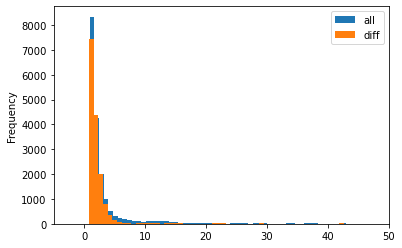

In [6]:
all_df['mapping_cov'].plot.hist(bins=100)
diff_df['mapping_cov'].plot.hist(bins=100)
# use .kde() for smooth

plt.legend(['all', 'diff'])
plt.axis(xmin=-5, xmax=50)

In [7]:
# Fitting Discrete Distributions to Data With SciPy (Python)
# https://www.youtube.com/watch?v=TwbJCt36_DU&t=0s
# plt.hist(all_df, bins=int(np.max(data)), density=True, alpha=0.5)
#or use bins 100 here: plt.hist(all_df, bins=100, density=True, alpha=0.5)
# plt.show()
# poisson distribution: only one parameter --> mean == variance

(array([5.75556505e-01, 2.93370872e-01, 1.39332177e-01, 6.78018819e-02,
        3.63175050e-02, 2.26466571e-02, 1.60874119e-02, 1.20828201e-02,
        1.04947923e-02, 8.07822829e-03, 6.76637925e-03, 6.28306645e-03,
        6.97351331e-03, 7.24969206e-03, 8.21631766e-03, 6.97351331e-03,
        8.35440704e-03, 6.14497708e-03, 4.83312804e-03, 3.03796620e-03,
        1.93325122e-03, 1.79516184e-03, 1.79516184e-03, 1.44993841e-03,
        1.65707247e-03, 1.93325122e-03, 2.27847465e-03, 1.86420653e-03,
        1.79516184e-03, 6.90446863e-04, 1.65707247e-03, 1.03567029e-03,
        1.65707247e-03, 1.86420653e-03, 7.59491549e-04, 1.24280435e-03,
        8.97580921e-04, 1.93325122e-03, 6.90446863e-04, 6.90446863e-04,
        6.21402176e-04, 4.83312804e-04, 2.27847465e-03, 1.58802778e-03,
        4.83312804e-04, 5.52357490e-04, 9.66625608e-04, 1.79516184e-03,
        1.10471498e-03, 5.52357490e-04, 0.00000000e+00, 6.21402176e-04,
        6.21402176e-04, 6.90446863e-05, 1.86420653e-03, 6.904468

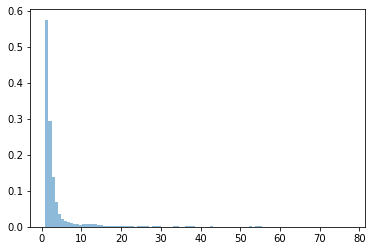

In [10]:
plt.hist(all_df['mapping_cov'], bins=100, density=True, alpha=0.5)

In [11]:
plt.show()

In [29]:
all_df.head()

,read_name,mapping_cov
0,ERR257715.14830926,1.96
1,ERR257715.25631576,2.91
2,ERR257715.20092711,2.91
3,ERR257715.35180992,2.71
4,ERR257715.14830926,2.61


In [36]:
def loss_function (params, all_df_in):
    mu = params[0]
    loss = 0
    for i in range(len(all_df_in)):
        loglikelihood = scipy.stats.poisson.logpmf(all_df_in[i], mu)
        loss_to_add = -loglikelihood
        loss += loss_to_add
    return(loss)

In [37]:
loss_function([20], all_df['mapping_cov'])

inf

In [38]:
params0 = np.array([20])
list(params0)

[20]

In [39]:
minium = scipy.optimize.fmin(loss_function, params0, args=(all_df['mapping_cov']),)
minium

ValueError: operands could not be broadcast together with shapes (0,) (18893,) 

In [18]:
### ~11:19
params0 = np.array([20])
minium = scipy.optimize.fmin(loss_function, params0, args=(all_df))

mufit = minium[0]
print("mu_fit")

x = list(range(int(np.min(all_df['mapping_cov']))), int(np.max(all_df['mapping_cov']))+1)
plt.scatter(x, scipy.stats.poisson.pmf(x, mu_fit), color="red")
plt.show()

ValueError: Unable to coerce to Series, length must be 2: given 0

## Questions for Jean (and maybe Titus ;) to resolve

question - why do the names in all CSV not have /1 and /2? (must be at least partly because you're running the mapping for the allCSV using a different read input file than for the diff CSV)


TODO:
* plot these plots for ~5 genomes; do they all look like poisson distributions?
* if so, can we fit poisson distribution to them and extract the lambda parameter and compare lambda parameters?
* we might also want to measure goodness of fit to each distribution so we can see how well the distributions fit to poisson and highlight places where they are not poisson random